# Problem Statement:
**The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).**

**This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.**

-------------------

# Attribute Information

**Input variables (based on physicochemical tests):**

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)**

**What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.**

------------------

## --------------------------------------------------------------------------------------------------------

In [2]:
# Now import some important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
489,9.3,0.39,0.40,2.6,0.073,10.0,26.0,0.99840,3.34,0.75,10.2,6
722,7.6,0.42,0.08,2.7,0.084,15.0,48.0,0.99680,3.21,0.59,10.0,5
819,9.1,0.66,0.15,3.2,0.097,9.0,59.0,0.99976,3.28,0.54,9.6,5
1318,7.5,0.63,0.27,2.0,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6
1378,7.2,0.45,0.15,2.0,0.078,10.0,28.0,0.99609,3.29,0.51,9.9,6


In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
print("Rows, columns: " + str(df.shape))

Rows, columns: (1599, 12)


# Now lets check null values in the columns

In [10]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


**soo here the output is representing in booleans type and here we have 1599 rows and 12 columns which is a large data and we not able to see the complete rows here ,so we will go for next step.**

In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Here we can see properly that we dont have any Null Values in any columns..**

In [12]:
df.isnull().sum().sum()


0

<AxesSubplot:>

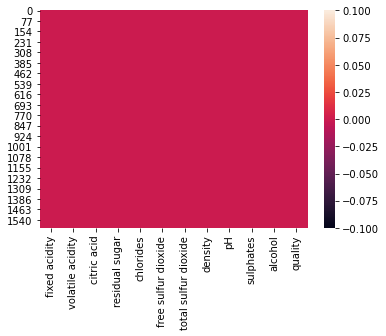

In [13]:
sns.heatmap(df.isnull())

**0 Null Values**

-----

### But before going for EDA ,1st distribute target column into 1 and 0 ,as specified in project discription..When value is 7 or above its 1 and else it 0

In [14]:
# Creating Our own target variable
df['quality_new'] = [1 if x >= 7 else 0 for x in df['quality']]

-------------------

In [15]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_new
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [16]:
# Now lets drop quality columns from the data frame ,other we will get 2 outputs

df= df.drop('quality', axis = 1)

In [17]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_new
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


**So This is our New Classification Model DataFrame**

# ---------------------------------------------------------------

# EDA

## Now Let do Univariate Analysis

In [18]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_new'],
      dtype='object')

<AxesSubplot:xlabel='fixed acidity', ylabel='quality_new'>

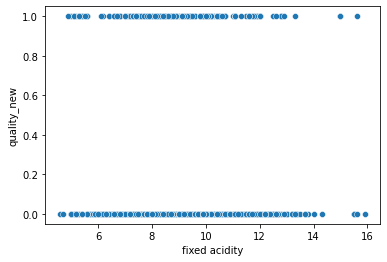

In [19]:
sns.scatterplot(x='fixed acidity',y='quality_new',data=df)

**We can see the Fixed acidity is equally distributed in the range of 0 to 13 with the quality_new of 0 and 1 . .**

<AxesSubplot:xlabel='volatile acidity', ylabel='quality_new'>

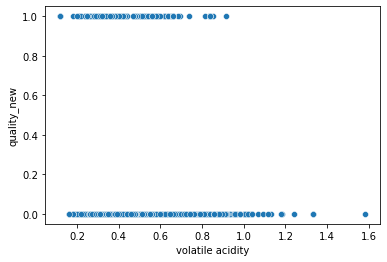

In [20]:
sns.scatterplot(x='volatile acidity',y='quality_new',data=df)

**We can see the volatile acidity is equally distributed in the range of 0.0 to 0.9  with the quality_new of 0 and 1 . .**

<AxesSubplot:xlabel='citric acid', ylabel='quality_new'>

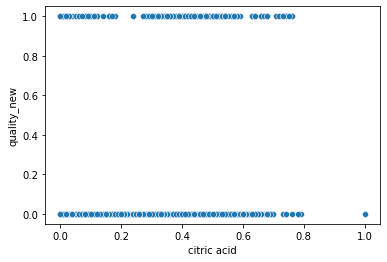

In [21]:
sns.scatterplot(x='citric acid',y='quality_new',data=df)

**We can see the citric acidity is equally distributed in the range of 0.0 to 0.8  with the quality_new of 0 and 1 . .**

<AxesSubplot:xlabel='residual sugar', ylabel='quality_new'>

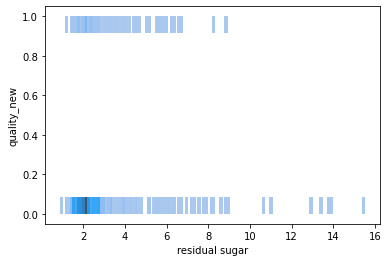

In [22]:
sns.histplot(x='residual sugar',y='quality_new',data=df)

**We can see the residual sugar is equally distributed in the range of 0.0 to 0.7  with the quality_new of 0 and 1 . .**

<AxesSubplot:xlabel='chlorides', ylabel='quality_new'>

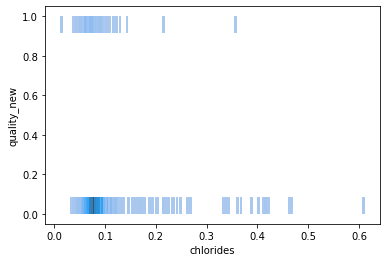

In [23]:
sns.histplot(x='chlorides',y='quality_new',data=df)

**We can see the chlorides is equally distributed in the range of 0.0 to 0.2  with the quality_new of 0 and 1 . .**

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality_new'>

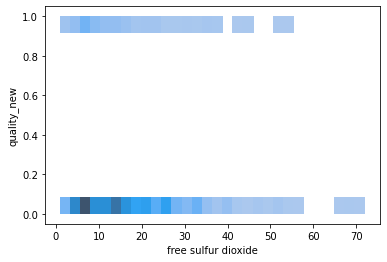

In [24]:
sns.histplot(x='free sulfur dioxide',y='quality_new',data=df)

**We can see the free sulfur dioxide is equally distributed in the range of 0 to 35  with the quality_new of 0 and 1 . .**

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality_new'>

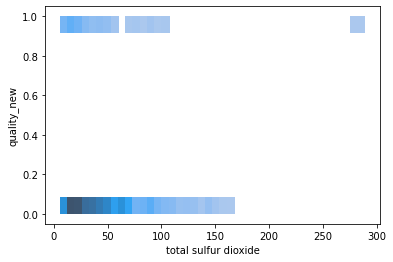

In [25]:
sns.histplot(x='total sulfur dioxide',y='quality_new',data=df)

**We can see the total sulfur dioxide is equally distributed in the range of 0 to 120  with the quality_new of 0 and 1 . .**

<AxesSubplot:xlabel='density', ylabel='quality_new'>

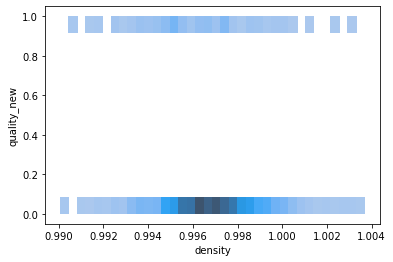

In [26]:
sns.histplot(x='density',y='quality_new',data=df)

**We can see the density is equally distributed in the range of 0.992 to 1.001  with the quality_new of 0 and 1 . .**

<AxesSubplot:xlabel='pH', ylabel='quality_new'>

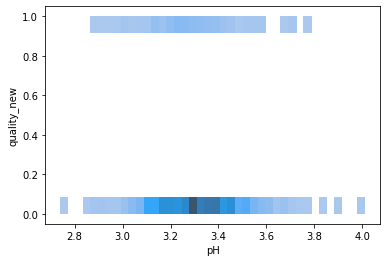

In [27]:
sns.histplot(x='pH',y='quality_new',data=df)

**We can see the pH is equally distributed in the range of 2.8 to 3.6  with the quality_new of 0 and 1 . .**

<AxesSubplot:xlabel='sulphates', ylabel='quality_new'>

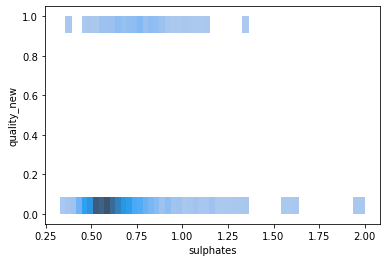

In [28]:
sns.histplot(x='sulphates',y='quality_new',data=df)

**We can see the pH is equally distributed in the range of 0.30 to 1.20  with the quality_new of 0 and 1 . .**

<AxesSubplot:xlabel='alcohol', ylabel='quality_new'>

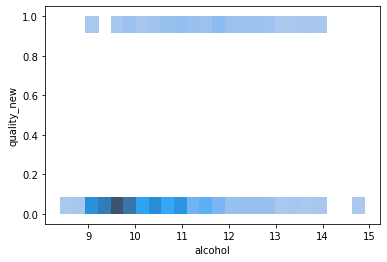

In [29]:
sns.histplot(x='alcohol',y='quality_new',data=df)

**We can see the pH is equally distributed in the range of 9.5 to 14  with the quality_new of 0 and 1 . .**

### ----------------------------------------------------------------------------------------------

## Now lets do some Bi variate analysis which are more equally distributed with target column

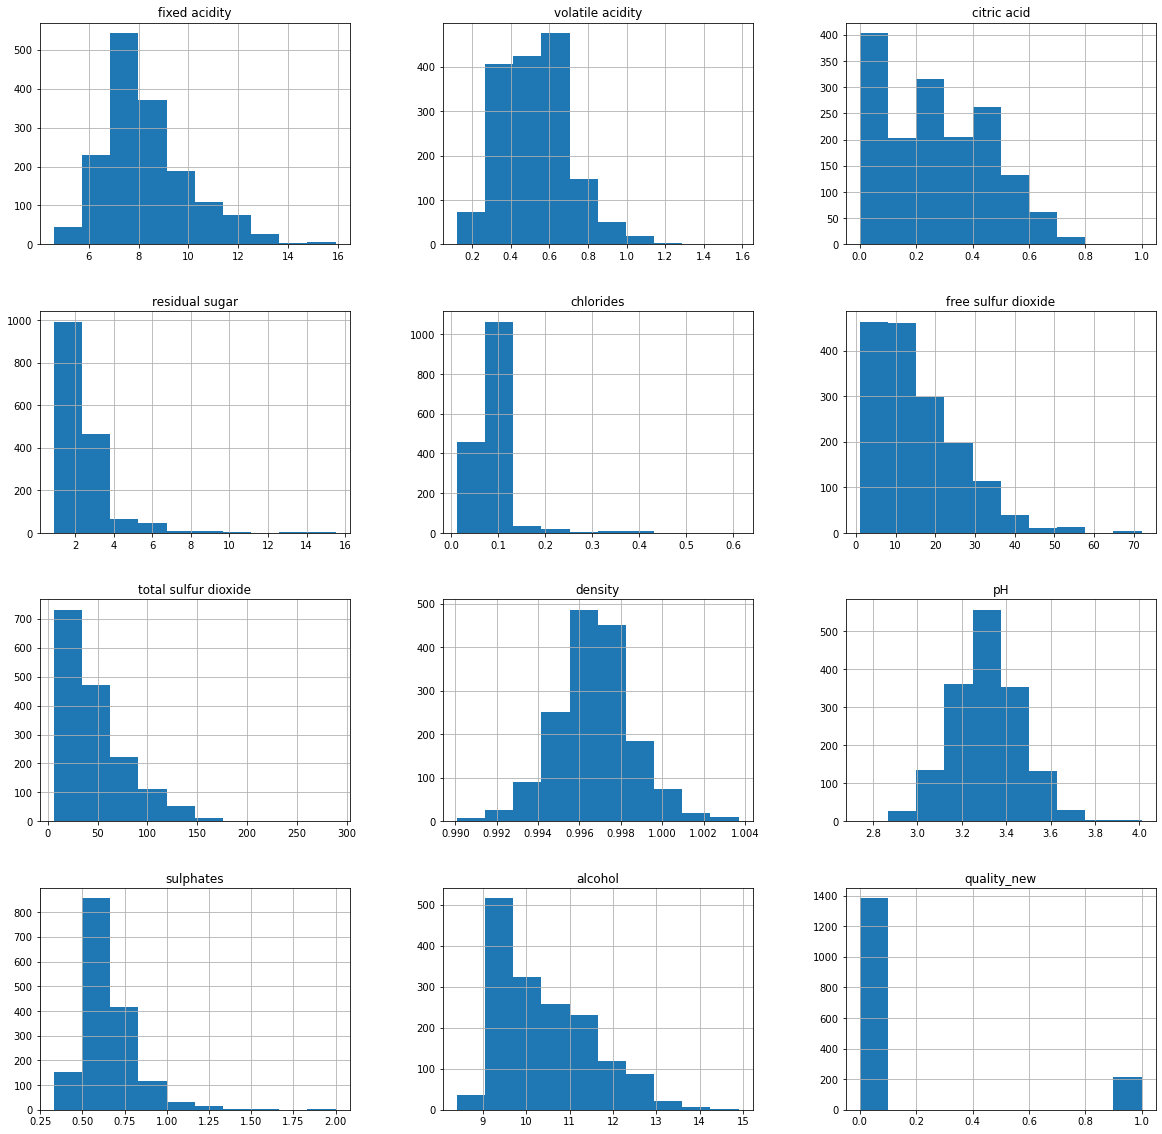

In [30]:
df.hist(bins=10, figsize=(20,20))
plt.show()


**1. we can see that many of the data are highly skewed**

**2. here in quality_new ,good quaility of wine or 1 is less or imbalanced as compared to 0 or bad quality**

**3. Density and pH are having normally distributed and are not skewed**


<AxesSubplot:xlabel='alcohol', ylabel='density'>

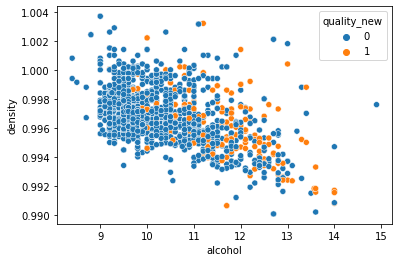

In [31]:
sns.scatterplot(x='alcohol',y='density',hue='quality_new',data=df)

**0 is more scattered than 1 and it is considered the density of water is close to that of water depending on the percent alcohol and here we can see that the data is scattered  between 9 to 13** 

<AxesSubplot:xlabel='pH', ylabel='density'>

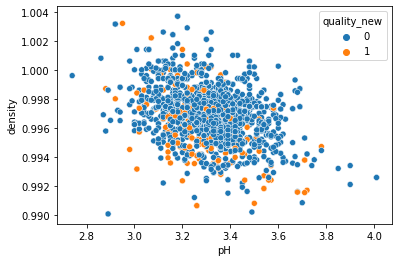

In [32]:
sns.scatterplot(x='pH',y='density',hue='quality_new',data=df)

**pH :- describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the graph**

**And we can clearly see that the max data is scattered between 3 to 3.6 for density and pH**
    

<Figure size 1800x2160 with 0 Axes>

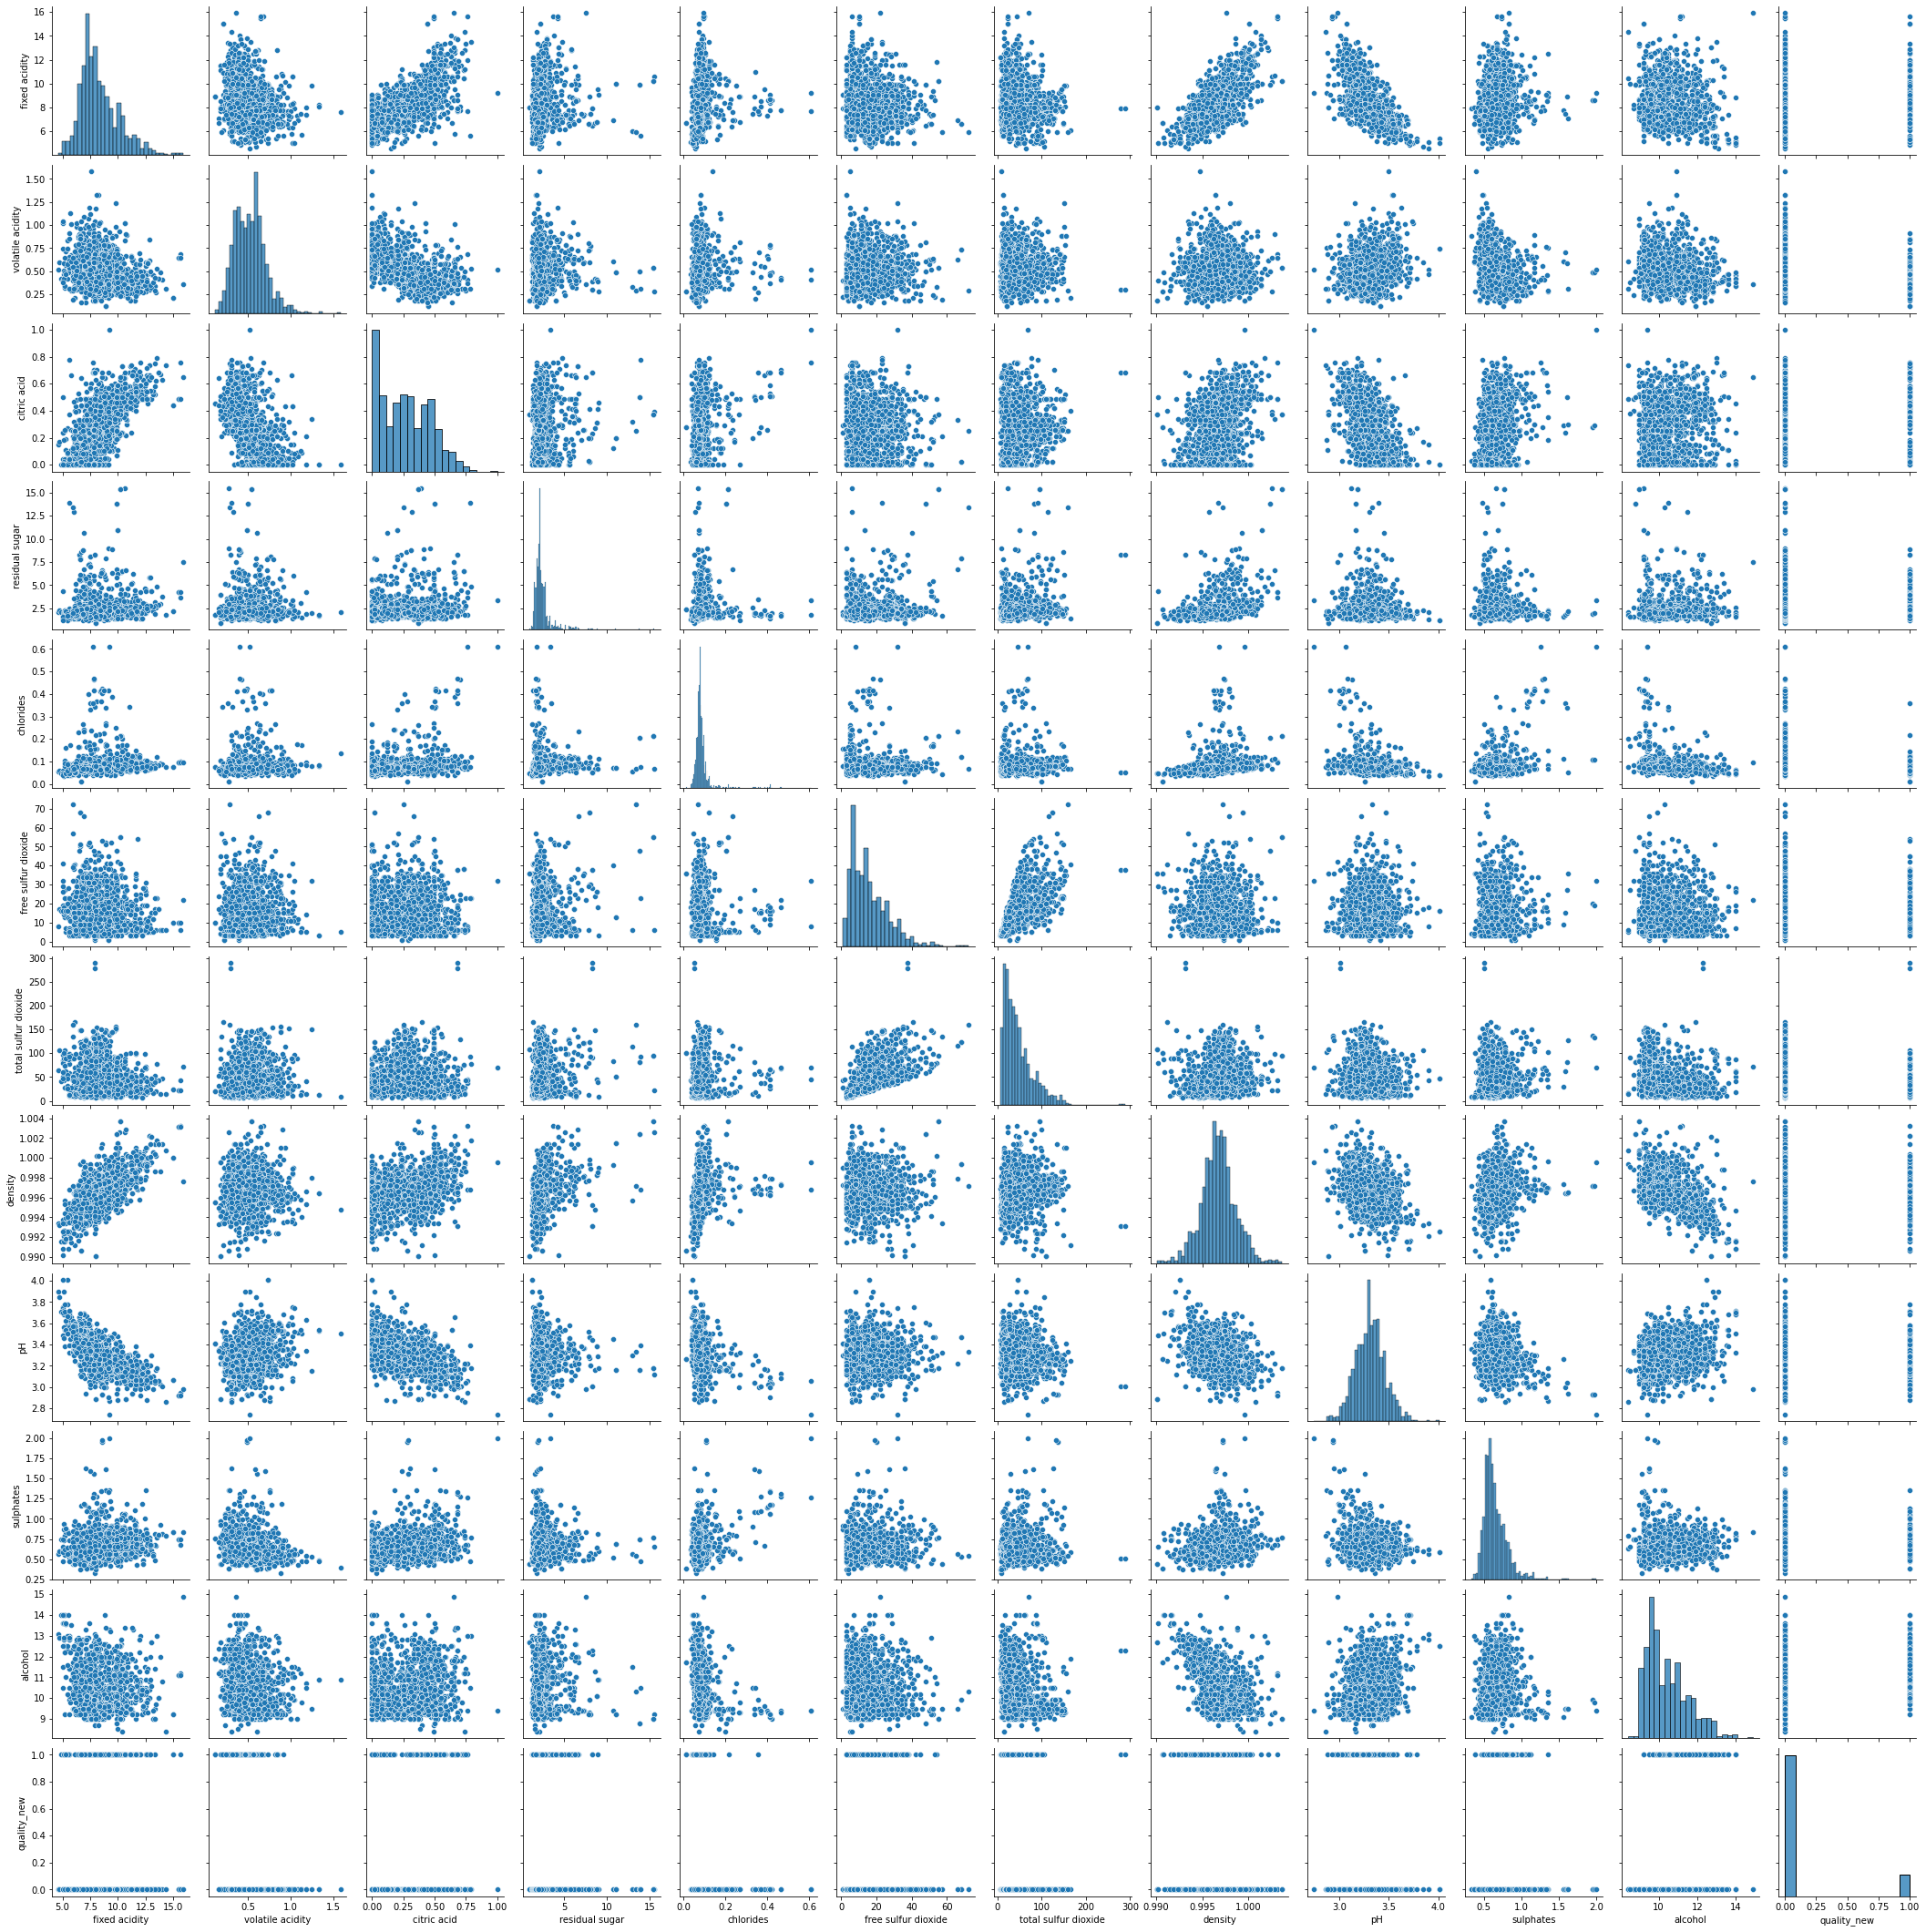

In [33]:
# Lets plot eerything all together

plt.figure(figsize=(25,30))

sns.pairplot(df)

plt.show()

# Correlation

In [34]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_new
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


In [35]:
df.corr()['quality_new'].sort_values()

volatile acidity       -0.270712
density                -0.150460
total sulfur dioxide   -0.139517
chlorides              -0.097308
free sulfur dioxide    -0.071747
pH                     -0.057283
residual sugar          0.047779
fixed acidity           0.120061
sulphates               0.199485
citric acid             0.214716
alcohol                 0.407315
quality_new             1.000000
Name: quality_new, dtype: float64

**Here all the datasets are different and have no Multicollinearity**

<AxesSubplot:>

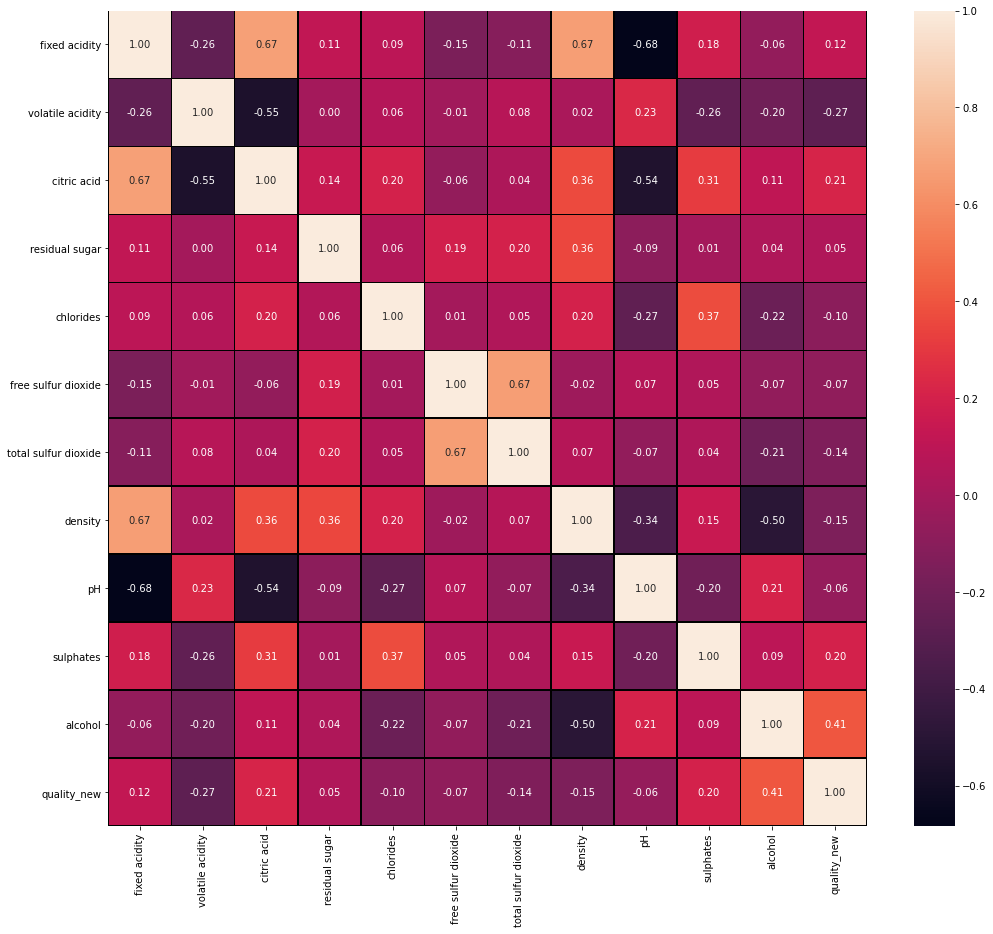

In [36]:
plt.figure(figsize=(17,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

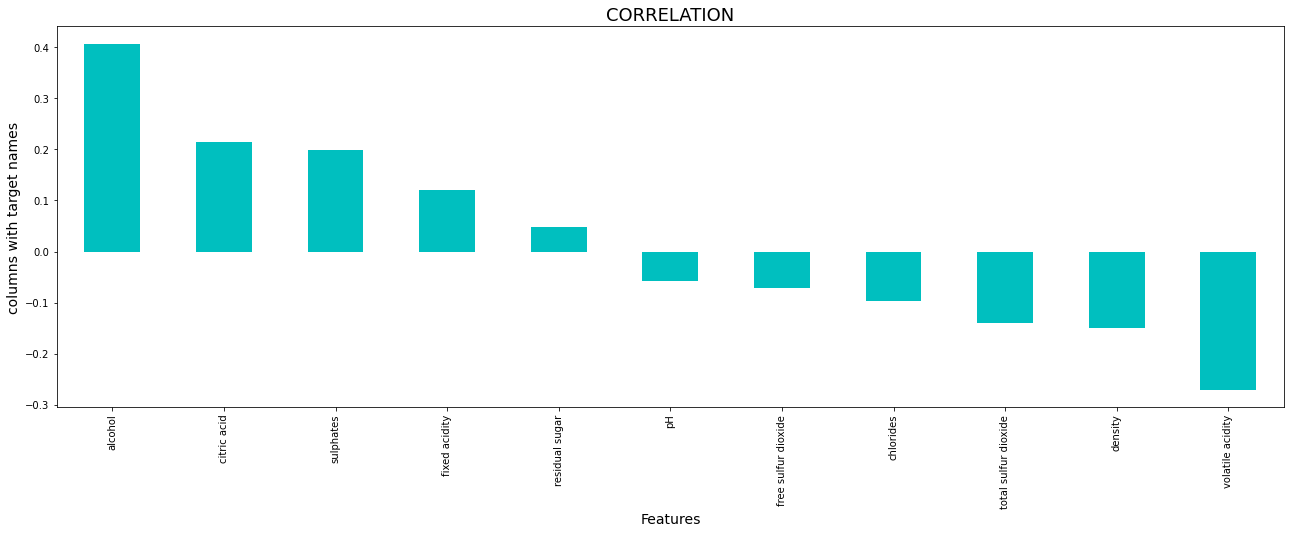

In [37]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(22,7))
df.corr()['quality_new'].sort_values(ascending=False).drop(['quality_new']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

# DESCRIPTIVE STATSTICS

In [38]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_new
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


<AxesSubplot:>

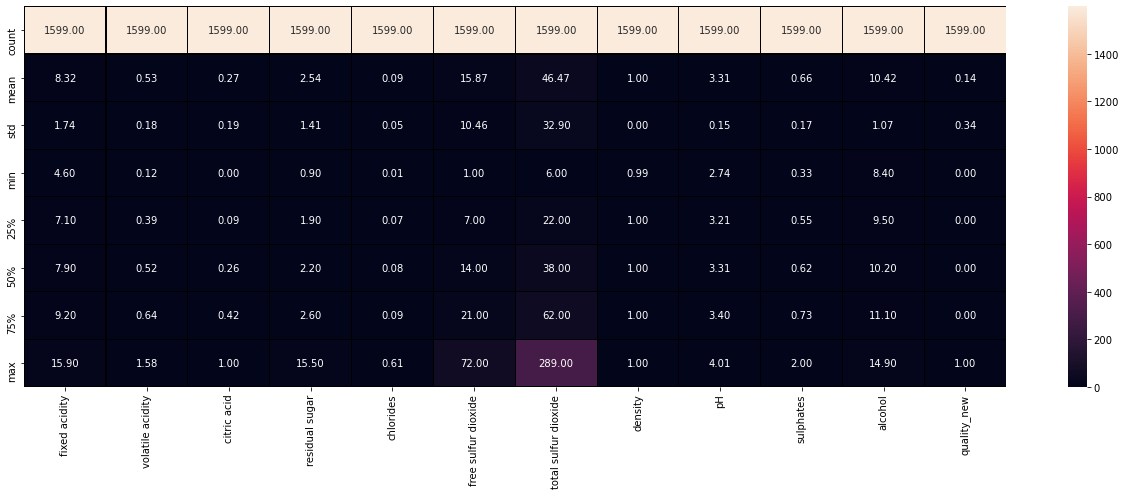

In [39]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

### Outcome of describe() of dataset :-

**from the above plotting we are determining mean,standard deviation,minimum and maximum value of each column**

-----------------------------------------------------
**Total number rows and column in dataset**

1. Rows :- 1599
2. columns :- 12
-----------------------------------------------------
**Fixed acidity**

Mean    :- 0.53

std     :- 1.74

minimum :- 4.60

Maximum :- 15.90

------------------------------------------------------
**Volatile acidity**

Mean    :- 8.32

std     :- 0.18

minimum :- 0.12

Maximum :- 1.58

-------------------------------------------------------
**Citric Acid**

Mean    :- 0.27

std     :- 0.19

minimum :- 0.00

Maximum :- 1.00

----------------------------------------------------------
**Residual Suger**

Mean    :- 2.54

std     :- 1.41

minimum :- 0.90

Maximum :- 15.50

----------------------------------------------------------
**Chlorides**

Mean    :- 0.05

std     :- 0.09

minimum :- 0.01

Maximum :- 0.61

-------------------------------------------------------------
**Free Sulfur dioxide**

Mean    :- 15.87

std     :- 10.46

minimum :- 1.00

Maximum :- 72.00

-------------------------------------------------------------
**Total Sulfur Dioxide**

Mean    :- 46.47

std     :- 32.90

minimum :- 6.00

Maximum :- 289.00

-------------------------------------------------------------
**Density**

Mean    :- 1.00

std     :- 0.00

minimum :- 0.99

Maximum :- 1.00

--------------------------------------------------------------
**pH**

Mean    :- 3.31

std     :- 0.15

minimum :- 2.74

Maximum :- 4.01

----------------------------------------------------------------
**Sulphates**

Mean    :- 0.66

std     :- 0.17

minimum :- 0.33

Maximum :- 2.00

---------------------------------------------------------------
**Alcohol**

Mean    :- 10.42

std     :- 1.07

minimum :- 8.40

Maximum :- 14.90

----------------------------------------------------------------

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality_new           1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**From the above cell we can get have the datatypes of the columns and memory used by dataframe**

# OUTLIERS CHECKING

In [41]:
# here we will make the variable where we will give some values

colmlist=df.columns.values
ncol=30
nrows=14

In [42]:
colmlist

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality_new'], dtype=object)

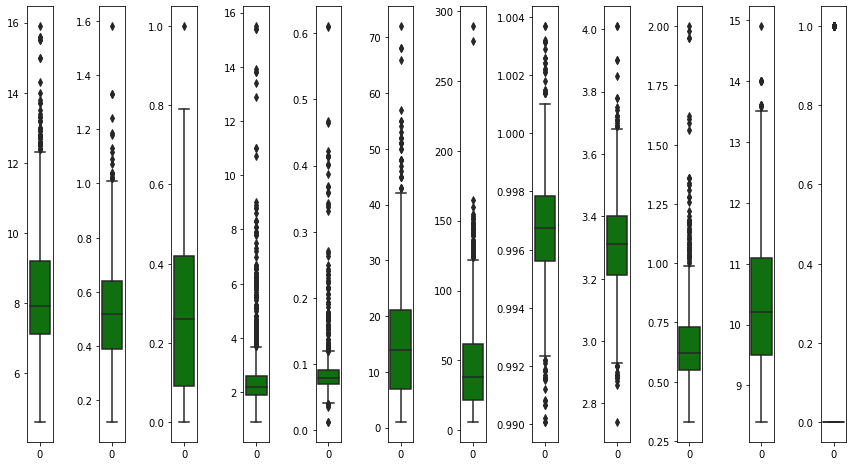

In [43]:
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(colmlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= df[colmlist[i]],color='green',orient='v')
    plt.tight_layout()

**We can see that Outliers are present in maximum of the data ,we are going to remove this later but 1st we will remove skewness..**

# Skewness

In [44]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality_new             2.129363
dtype: float64

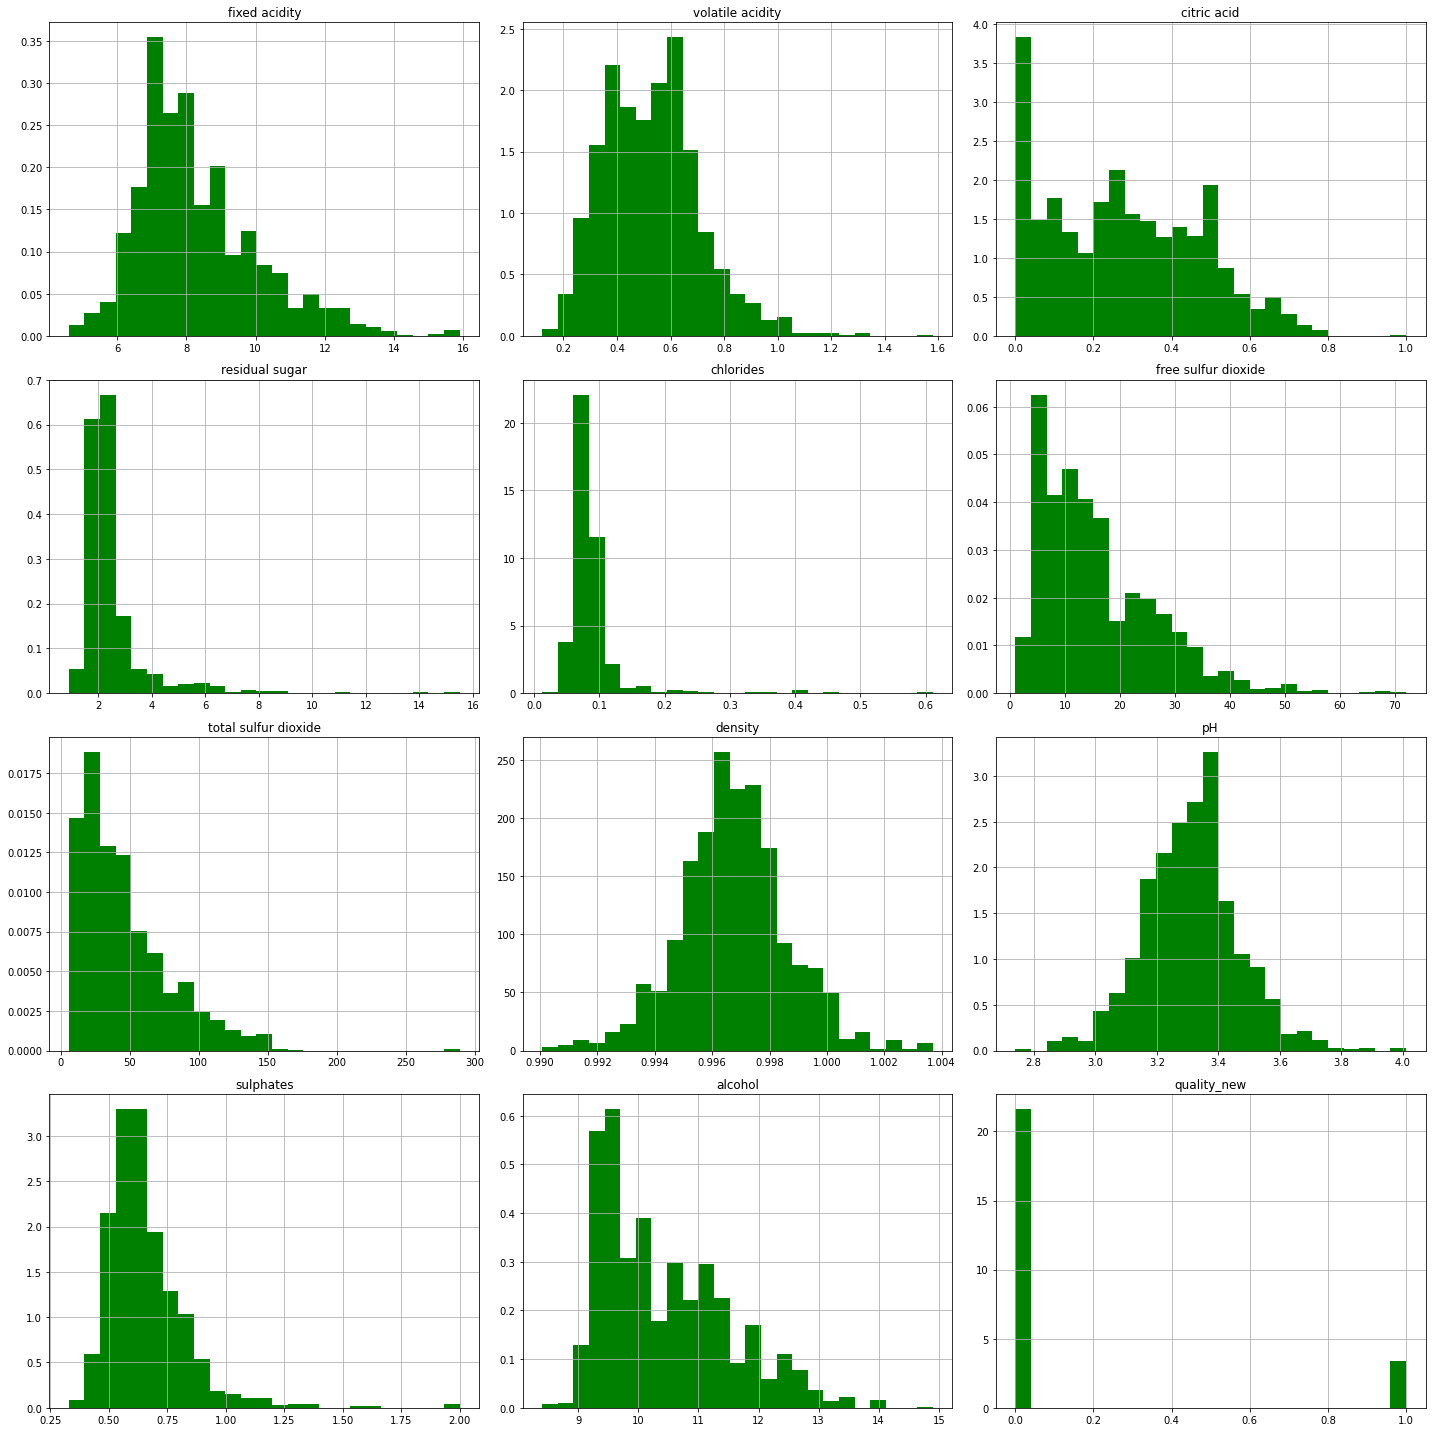

In [45]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
df.hist(bins=25,color='green',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

#### Lets take some of the data and do some of the plotting of skewness although we can see all skewed columns on above plotting

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

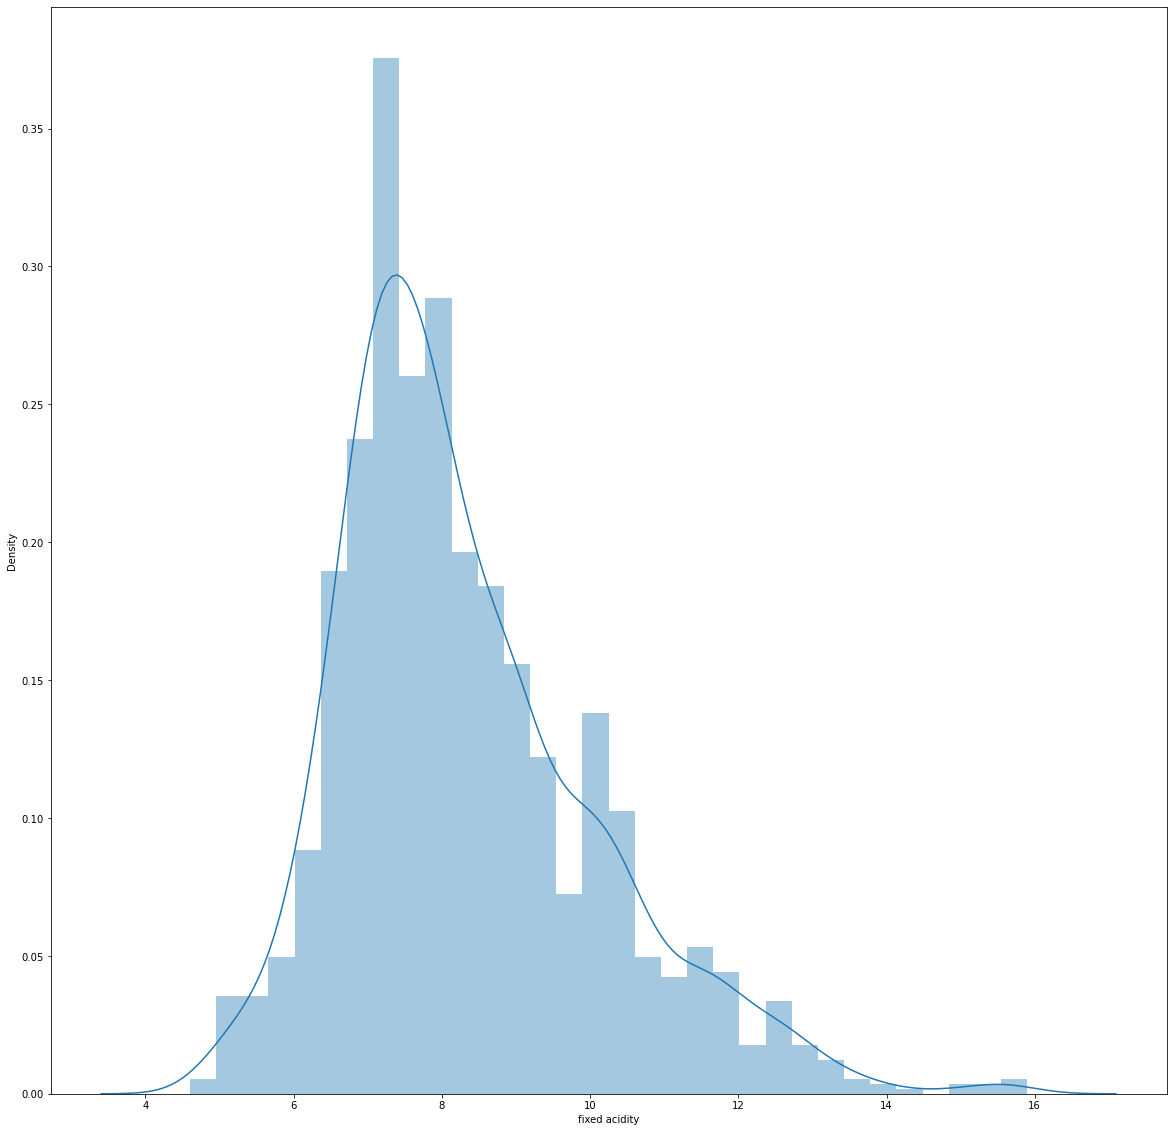

In [46]:
sns.distplot(df['fixed acidity'])

**The data of the column is not normalised ...The building block is out of normalized curve..It a right skewed data..**

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

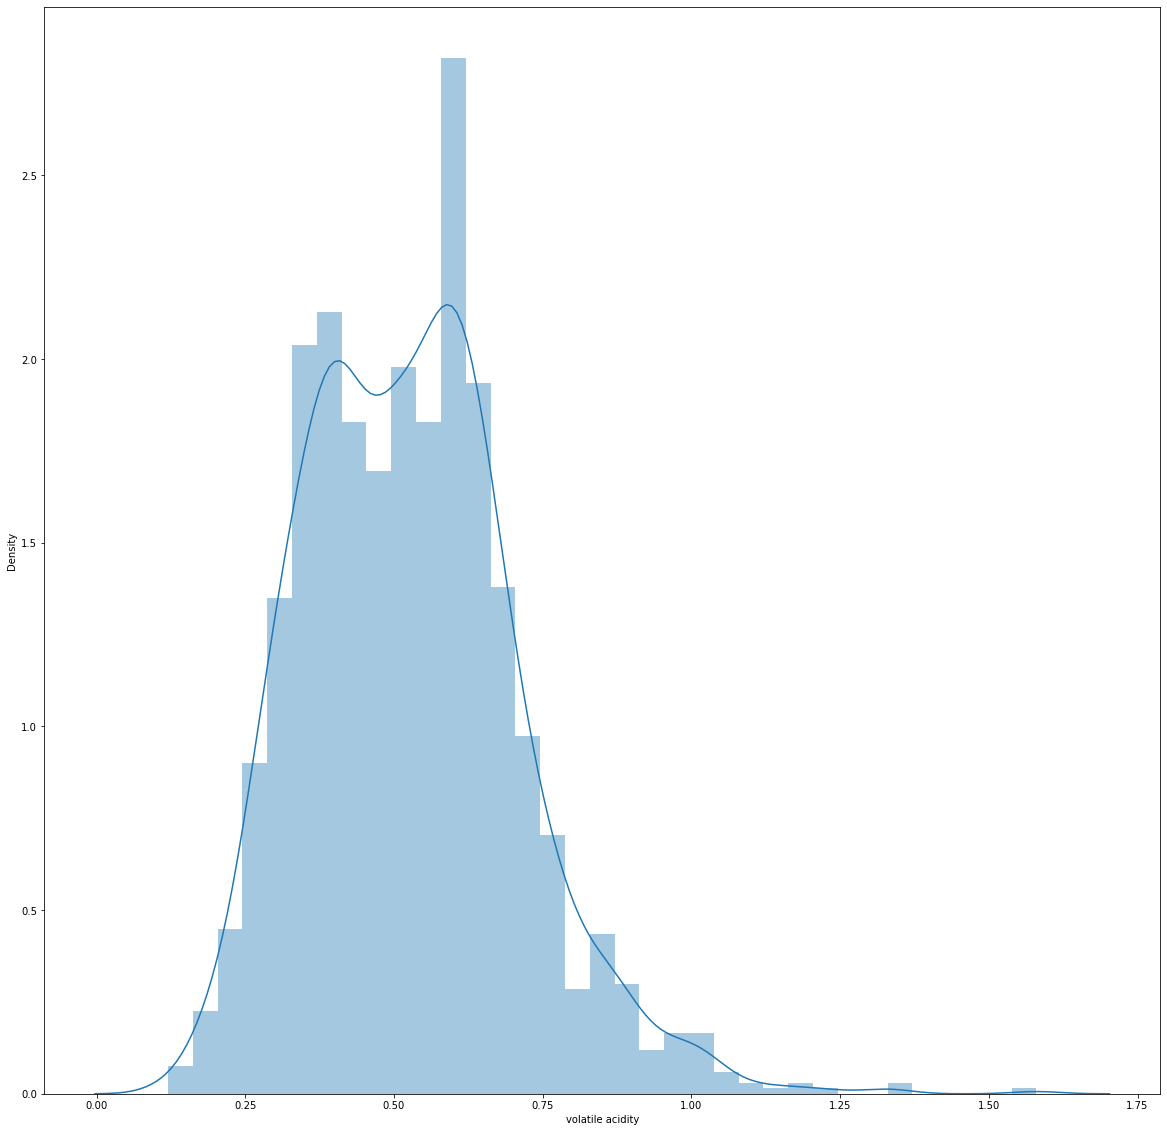

In [47]:
sns.distplot(df['volatile acidity'])

**The data of the column is not normalised ...The building block is out of normalized curve..It a right skewed data..**

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

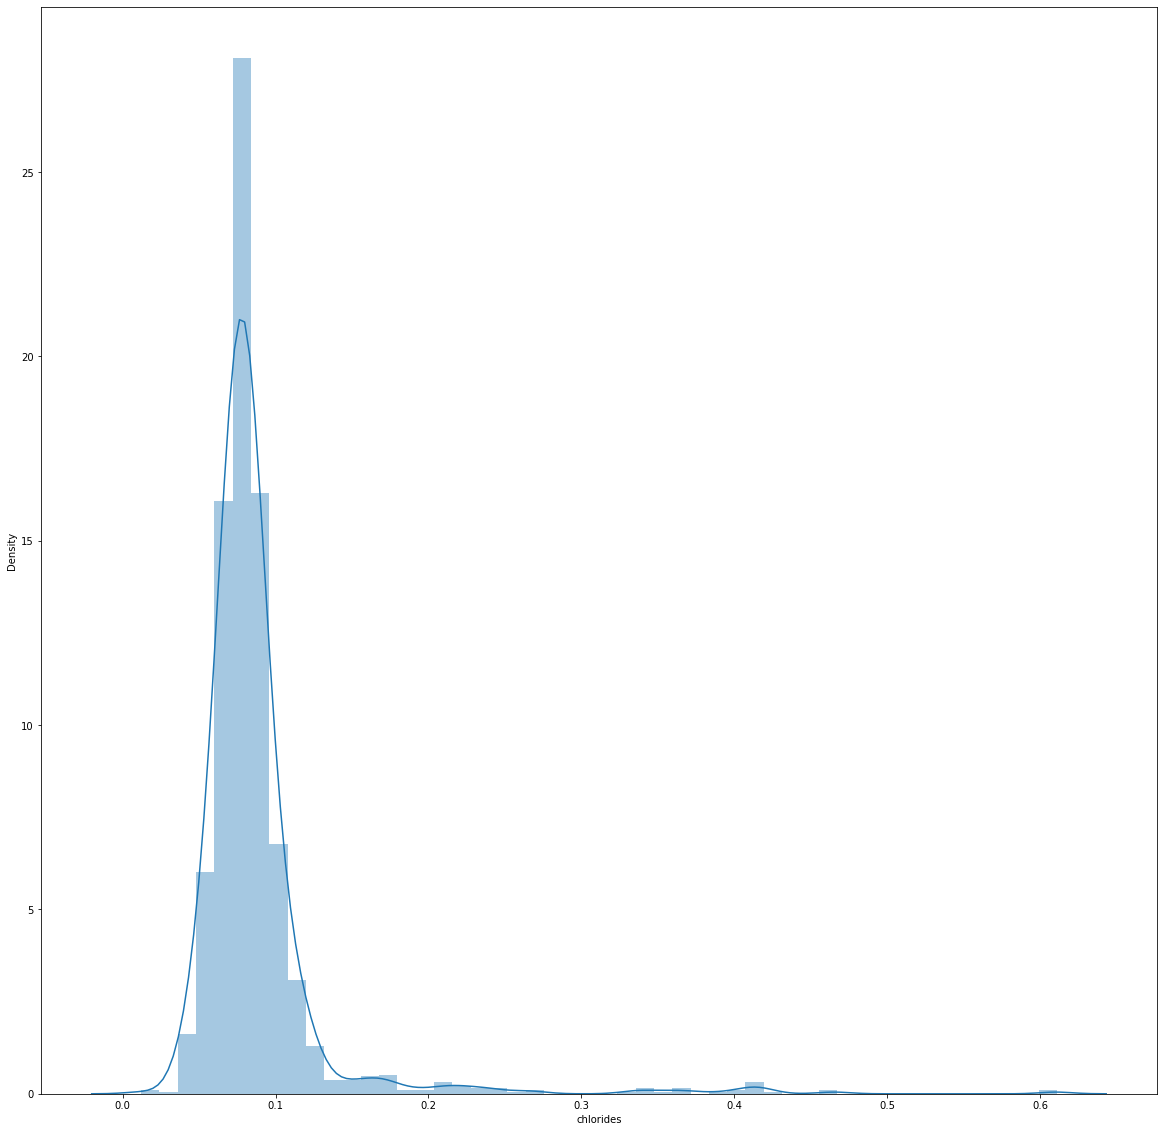

In [48]:
sns.distplot(df['chlorides'])

**Its a right skewed data and it is not Normalized**

###### CONCLUSION:- 

**we can see that the data is not normally distributed** 

**Normal distribution curve of outcome column  is irrelevent**

## Data Cleaning and Preprocessing/

In [49]:
# We will extract the quality_new column from the corelation matrixs

df.corr()['quality_new']

fixed acidity           0.120061
volatile acidity       -0.270712
citric acid             0.214716
residual sugar          0.047779
chlorides              -0.097308
free sulfur dioxide    -0.071747
total sulfur dioxide   -0.139517
density                -0.150460
pH                     -0.057283
sulphates               0.199485
alcohol                 0.407315
quality_new             1.000000
Name: quality_new, dtype: float64

In [50]:
# making a dataframe which is a conclusion of the columns that we will be dropping from the data

delete=pd.DataFrame([["-0.270712","volatile acidity","No","Alot"],["-0.150460","density","No","Alot"]],
                    columns=["Corelation with target","Column name","Normalised","Outliers"])

delete

,Corelation with target,Column name,Normalised,Outliers
0,-0.270712,volatile acidity,No,Alot
1,-0.150460,density,No,Alot


In [51]:
df=df.drop(["volatile acidity","density"],axis=1)
df

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality_new
0,7.4,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
1,7.8,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,0
2,7.8,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,0
3,11.2,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,0
4,7.4,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5,0
1595,5.9,0.10,2.2,0.062,39.0,51.0,3.52,0.76,11.2,0
1596,6.3,0.13,2.3,0.076,29.0,40.0,3.42,0.75,11.0,0
1597,5.9,0.12,2.0,0.075,32.0,44.0,3.57,0.71,10.2,0


# Removing Outliers

In [52]:
from scipy.stats import zscore

In [53]:
z=np.abs(zscore(df))
z.shape

(1599, 10)

In [54]:

np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   42,   43,   45,
          57,   81,   81,   83,   86,   88,   91,   92,   95,  106,  106,
         109,  142,  144,  147,  151,  151,  151,  151,  163,  164,  169,
         169,  181,  226,  226,  240,  243,  244,  258,  258,  274,  281,
         291,  324,  325,  339,  340,  347,  354,  374,  381,  391,  396,
         396,  400,  400,  442,  451,  467,  480,  494,  515,  544,  554,
         555,  557,  568,  584,  588,  591,  595,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  684,  692,  692,  695,  723,
         730,  754,  776,  777,  795,  821,  911,  917,  923,  925,  926,
         982, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111,
        1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260,
        1269, 1270, 1288, 1289, 1295, 1296, 1300, 1316, 1319, 1319, 1321,
        1358, 1367, 1370, 1370, 1372, 1372, 1374, 1434, 1434, 1435, 1435,
        1474, 1474, 1476, 1476, 1493, 

In [55]:
df_new=df[(z<3).all(axis=1)]

In [56]:
df_new.shape

(1474, 10)

In [57]:
df.shape

(1599, 10)

In [58]:
print ("Old DataFrame =",df.shape)
print ("New DataFrame =",df_new.shape)
print ("Total dropped rows = ",df.shape[0] - df_new.shape[0])

Old DataFrame = (1599, 10)
New DataFrame = (1474, 10)
Total dropped rows =  125


#### Percentage Data Loss

In [59]:
loss_percent=(1599-1474)/1599*100
print (loss_percent,'%')

7.8173858661663544 %


**Data Loss while Removing the Outliers are**

In [60]:
df_new

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality_new
0,7.4,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
1,7.8,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,0
2,7.8,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,0
3,11.2,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,0
4,7.4,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5,0
1595,5.9,0.10,2.2,0.062,39.0,51.0,3.52,0.76,11.2,0
1596,6.3,0.13,2.3,0.076,29.0,40.0,3.42,0.75,11.0,0
1597,5.9,0.12,2.0,0.075,32.0,44.0,3.57,0.71,10.2,0


In [61]:
# Independent column

x=df_new.iloc[:,0:-1]

In [62]:
x.shape

(1474, 9)

In [63]:
# Target or dependent variable

y=df_new.iloc[:,-1]

In [64]:
y.shape

(1474,)

### --------------------------------------------------------------------------------------------------

## TRANSFORMING DATA TO REMOVE SKEWNESS

In [65]:
from sklearn.preprocessing import power_transform

In [66]:
x=power_transform(x,method='yeo-johnson')

In [67]:
x

array([[-0.46457655, -1.51864298, -0.59873522, ...,  1.35070081,
        -0.57085948, -1.11531933],
       [-0.16849254, -1.51864298,  0.62586956, ..., -0.81663812,
         0.45948347, -0.53326376],
       [-0.16849254, -1.23905363,  0.19201591, ..., -0.38716756,
         0.22972338, -0.53326376],
       ...,
       [-1.44252867, -0.6594059 ,  0.19201591, ...,  0.73436327,
         0.93608794,  0.73334746],
       [-1.87383862, -0.72071622, -0.37231188, ...,  1.75602466,
         0.67334788, -0.04158974],
       [-1.76147991,  1.07448032,  1.52690952, ...,  0.52663534,
         0.30816571,  0.73334746]])

In [68]:
# It will be a 2 dimensional data containg rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution

sc=StandardScaler()

x=sc.fit_transform(x)
x

array([[-0.46457655, -1.51864298, -0.59873522, ...,  1.35070081,
        -0.57085948, -1.11531933],
       [-0.16849254, -1.51864298,  0.62586956, ..., -0.81663812,
         0.45948347, -0.53326376],
       [-0.16849254, -1.23905363,  0.19201591, ..., -0.38716756,
         0.22972338, -0.53326376],
       ...,
       [-1.44252867, -0.6594059 ,  0.19201591, ...,  0.73436327,
         0.93608794,  0.73334746],
       [-1.87383862, -0.72071622, -0.37231188, ...,  1.75602466,
         0.67334788, -0.04158974],
       [-1.76147991,  1.07448032,  1.52690952, ...,  0.52663534,
         0.30816571,  0.73334746]])

In [69]:
x.mean()

-3.2136713512442342e-18

In [70]:
x.std()

1.0

#### Since the Outcome column have only 2 classes we will use  classification model.

In [71]:
df['quality_new'].unique()

array([0, 1], dtype=int64)

In [72]:
df['quality_new'].value_counts()

0    1382
1     217
Name: quality_new, dtype: int64

## Balancing the dataset over here,otherwise it will be a baised dataset

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [75]:
x.shape

(2542, 9)

In [76]:
y.value_counts()

1    1271
0    1271
Name: quality_new, dtype: int64

<AxesSubplot:xlabel='quality_new', ylabel='count'>

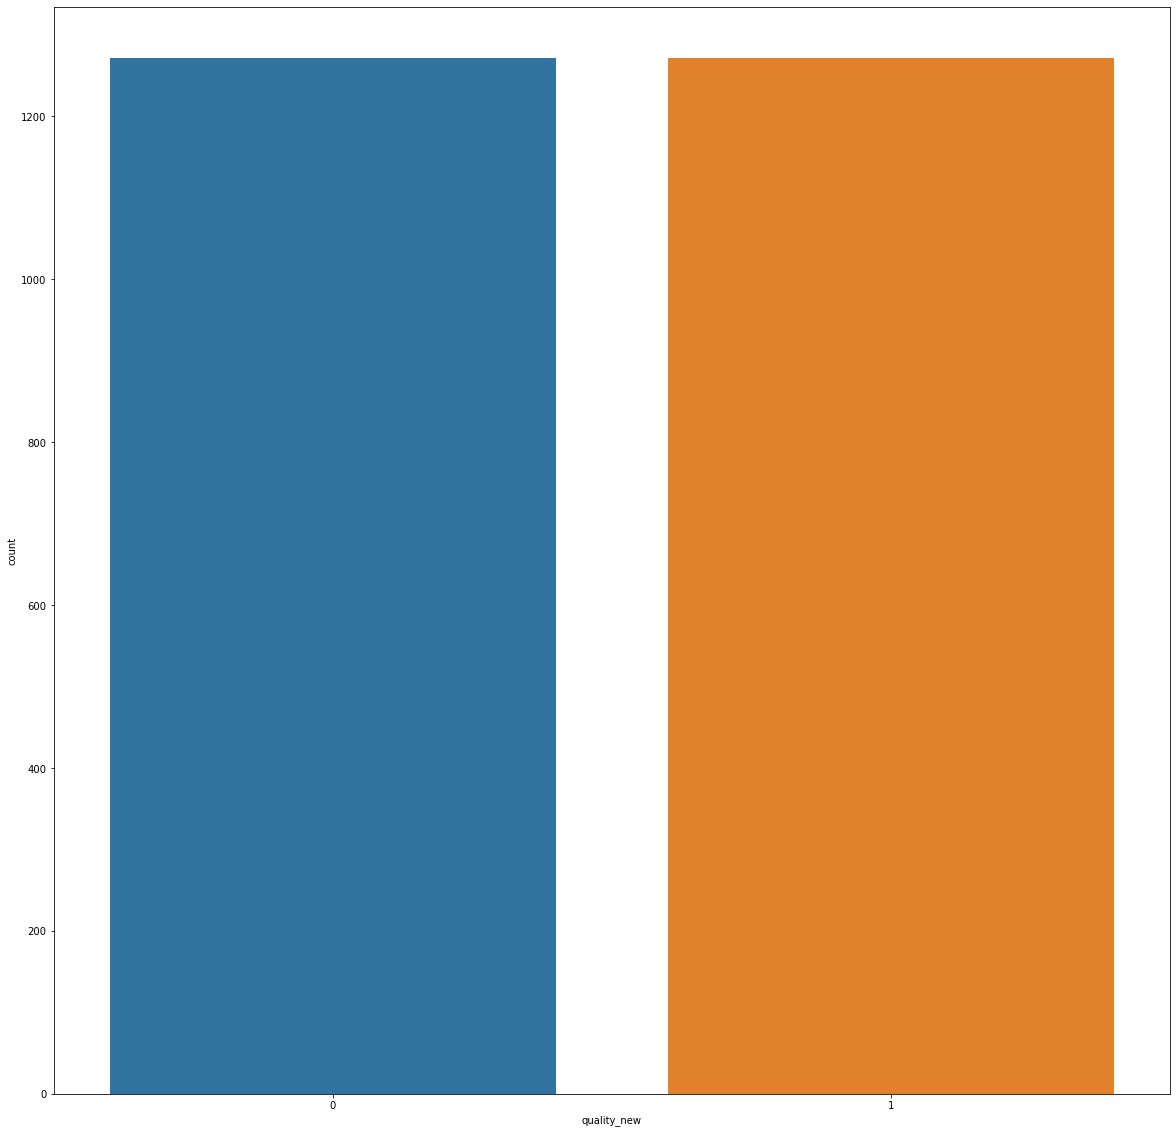

In [77]:
sns.countplot(y)

----------

-------------

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

###### Logistic Regression

In [79]:
lr=LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(pred_train,y_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

At random state  25  The model performs very well
At random_state:- 25
Training accuaracy_score is :- 82.3
Testing accuracy_score is:- 82.3 


At random state  104  The model performs very well
At random_state:- 104
Training accuaracy_score is :- 82.5
Testing accuracy_score is:- 82.5 


At random state  126  The model performs very well
At random_state:- 126
Training accuaracy_score is :- 82.5
Testing accuracy_score is:- 82.5 


At random state  174  The model performs very well
At random_state:- 174
Training accuaracy_score is :- 82.3
Testing accuracy_score is:- 82.3 


At random state  199  The model performs very well
At random_state:- 199
Training accuaracy_score is :- 82.3
Testing accuracy_score is:- 82.3 


At random state  257  The model performs very well
At random_state:- 257
Training accuaracy_score is :- 82.5
Testing accuracy_score is:- 82.5 


At random state  276  The model performs very well
At random_state:- 276
Training accuaracy_score is :- 82.1
Testing accuracy_score 

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=104)

In [82]:
lr.fit(x_train,y_train)

LogisticRegression()

In [83]:
pred_train=lr.predict(x_train)

In [84]:
pred_test=lr.predict(x_test)

In [85]:
accuracy_score(y_test,pred_test)

0.825147347740668

In [86]:
from sklearn.metrics import classification_report

In [87]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       251
           1       0.80      0.88      0.84       258

    accuracy                           0.83       509
   macro avg       0.83      0.82      0.82       509
weighted avg       0.83      0.83      0.82       509



## CROSS VALIDATION FOR LOGISTICS REGRESSION

In [88]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)


In [89]:
for i in range(4,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 4
Cross validation score is :- 80.95614817015797
Accuracy_score is :- 82.5147347740668


At cv:- 5
Cross validation score is :- 80.9177327784911
Accuracy_score is :- 82.5147347740668


At cv:- 6
Cross validation score is :- 80.76018109639146
Accuracy_score is :- 82.5147347740668


At cv:- 7
Cross validation score is :- 80.99606021683944
Accuracy_score is :- 82.5147347740668


At cv:- 8
Cross validation score is :- 81.07726722615718
Accuracy_score is :- 82.5147347740668


At cv:- 9
Cross validation score is :- 81.22989917215916
Accuracy_score is :- 82.5147347740668




**We will take CV 9 bcz it is more close to accuracy_score**

In [90]:
lsscore_selected= cross_val_score(lr,x,y,cv=9).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.8122989917215916 
The accuracy_score is: 0.825147347740668


In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_1_pred_train=algorithm_instance.predict(x_train)
    model_1_pred_test=algorithm_instance.predict(x_test)
    print ('accuracy of training model :-',accuracy_score(y_train,model_1_pred_train))
    print ('accuracy of test data :-',accuracy_score(y_test,model_1_pred_test))
    print ('classification report for test data \n', classification_report(y_test,model_1_pred_test))
    print ('classification report for test data \n', classification_report(y_train,model_1_pred_train))
    print ('confusion matrix : \n',confusion_matrix(y_test,model_1_pred_test))

In [93]:
# Logistics regression score
model_selection(lr,x_train,y_train,x_test,y_test)

accuracy of training model :- 0.8248893261190359
accuracy of test data :- 0.825147347740668
classification report for test data 
               precision    recall  f1-score   support

           0       0.86      0.77      0.81       251
           1       0.80      0.88      0.84       258

    accuracy                           0.83       509
   macro avg       0.83      0.82      0.82       509
weighted avg       0.83      0.83      0.82       509

classification report for test data 
               precision    recall  f1-score   support

           0       0.85      0.80      0.82      1020
           1       0.81      0.85      0.83      1013

    accuracy                           0.82      2033
   macro avg       0.83      0.82      0.82      2033
weighted avg       0.83      0.82      0.82      2033

confusion matrix : 
 [[194  57]
 [ 32 226]]


In [94]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [95]:
model_selection(dt,x_train,y_train,x_test,y_test)

accuracy of training model :- 1.0
accuracy of test data :- 0.899803536345776
classification report for test data 
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       251
           1       0.89      0.91      0.90       258

    accuracy                           0.90       509
   macro avg       0.90      0.90      0.90       509
weighted avg       0.90      0.90      0.90       509

classification report for test data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1020
           1       1.00      1.00      1.00      1013

    accuracy                           1.00      2033
   macro avg       1.00      1.00      1.00      2033
weighted avg       1.00      1.00      1.00      2033

confusion matrix : 
 [[222  29]
 [ 22 236]]


**here we can see that decision tree is performing well than logistic regression**

In [96]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()

In [97]:
model_selection(kn,x_train,y_train,x_test,y_test)

accuracy of training model :- 0.9198229217904574
accuracy of test data :- 0.8899803536345776
classification report for test data 
               precision    recall  f1-score   support

           0       0.99      0.79      0.88       251
           1       0.83      0.99      0.90       258

    accuracy                           0.89       509
   macro avg       0.91      0.89      0.89       509
weighted avg       0.91      0.89      0.89       509

classification report for test data 
               precision    recall  f1-score   support

           0       0.99      0.85      0.91      1020
           1       0.87      0.99      0.93      1013

    accuracy                           0.92      2033
   macro avg       0.93      0.92      0.92      2033
weighted avg       0.93      0.92      0.92      2033

confusion matrix : 
 [[198  53]
 [  3 255]]


In [98]:
from sklearn.svm import SVC
sv=SVC()

In [99]:
model_selection(sv,x_train,y_train,x_test,y_test)

accuracy of training model :- 0.9050664043285784
accuracy of test data :- 0.8919449901768173
classification report for test data 
               precision    recall  f1-score   support

           0       0.94      0.84      0.88       251
           1       0.86      0.95      0.90       258

    accuracy                           0.89       509
   macro avg       0.90      0.89      0.89       509
weighted avg       0.90      0.89      0.89       509

classification report for test data 
               precision    recall  f1-score   support

           0       0.93      0.88      0.90      1020
           1       0.88      0.93      0.91      1013

    accuracy                           0.91      2033
   macro avg       0.91      0.91      0.91      2033
weighted avg       0.91      0.91      0.90      2033

confusion matrix : 
 [[210  41]
 [ 14 244]]


##### ........................................................................................................................................................................

# So now lets train and test on DTC and KNN

In [100]:
# KNeighbors Classifier 

kn=KNeighborsClassifier()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    kn.fit(x_train,y_train)
    pred_train=kn.predict(x_train)
    pred_test=kn.predict(x_test)
    if round(accuracy_score(pred_train,y_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

At random state  197  The model performs very well
At random_state:- 197
Training accuaracy_score is :- 91.4
Testing accuracy_score is:- 91.4 


At random state  244  The model performs very well
At random_state:- 244
Training accuaracy_score is :- 91.9
Testing accuracy_score is:- 91.9 


At random state  519  The model performs very well
At random_state:- 519
Training accuaracy_score is :- 92.1
Testing accuracy_score is:- 92.1 


At random state  531  The model performs very well
At random_state:- 531
Training accuaracy_score is :- 91.7
Testing accuracy_score is:- 91.7 




In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=519)

In [102]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [103]:
pred_train=kn.predict(x_train)

In [104]:
pred_test=kn.predict(x_test)

In [105]:
accuracy_score(y_train,pred_train)

0.9212985735366453

In [106]:
accuracy_score(y_test,pred_test)

0.9214145383104125

In [107]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       237
           1       0.87      1.00      0.93       272

    accuracy                           0.92       509
   macro avg       0.93      0.92      0.92       509
weighted avg       0.93      0.92      0.92       509



## Cross validation for KNeighborsClassifier

In [108]:
pred_kn=kn.predict(x_test)
from sklearn.model_selection import cross_val_score
kns=accuracy_score(y_test,pred_kn)

In [109]:
for i in range(4,20):
    lsscore=cross_val_score(kn,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",kns*100)
    print ("\n")

At cv:- 4
Cross validation score is :- 84.41941514386173
Accuracy_score is :- 92.14145383104125


At cv:- 5
Cross validation score is :- 85.16792228083473
Accuracy_score is :- 92.14145383104125


At cv:- 6
Cross validation score is :- 86.03240183177961
Accuracy_score is :- 92.14145383104125


At cv:- 7
Cross validation score is :- 86.15010530594948
Accuracy_score is :- 92.14145383104125


At cv:- 8
Cross validation score is :- 86.26892248477273
Accuracy_score is :- 92.14145383104125


At cv:- 9
Cross validation score is :- 86.4241619260039
Accuracy_score is :- 92.14145383104125


At cv:- 10
Cross validation score is :- 86.89532190829088
Accuracy_score is :- 92.14145383104125


At cv:- 11
Cross validation score is :- 86.81943709373176
Accuracy_score is :- 92.14145383104125


At cv:- 12
Cross validation score is :- 87.01693791171124
Accuracy_score is :- 92.14145383104125


At cv:- 13
Cross validation score is :- 87.48259066940386
Accuracy_score is :- 92.14145383104125


At cv:- 14
Cross 

In [110]:
lsscore_selected= cross_val_score(kn,x,y,cv=19).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",kns)

The cv score is :-  0.8776261155638507 
The accuracy_score is: 0.9214145383104125


**it is giving better result at training and testing ,and there is not much difference in accuracy and cross val score also**

## ----------------------------------------------------------------------------

In [111]:
# Decisio Tree Classifier 

dt=DecisionTreeClassifier()
for i in range(0,3000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    if round(accuracy_score(pred_train,y_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

In [112]:
# Here we know that there is no random state till 3000 which has eqal training and testing score

**So if we work with ds model it will give uss a bias result soo we will go for KNeighborsClassifier bcz it is giving better result at training and testing ,and there is not much difference in accuracy and cross val score also**

# SVC

In [113]:
sv=SVC()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    sv.fit(x_train,y_train)
    pred_train=sv.predict(x_train)
    pred_test=sv.predict(x_test)
    if round(accuracy_score(pred_train,y_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

At random state  165  The model performs very well
At random_state:- 165
Training accuaracy_score is :- 89.6
Testing accuracy_score is:- 89.6 


At random state  251  The model performs very well
At random_state:- 251
Training accuaracy_score is :- 90.0
Testing accuracy_score is:- 90.0 


At random state  318  The model performs very well
At random_state:- 318
Training accuaracy_score is :- 89.8
Testing accuracy_score is:- 89.8 


At random state  324  The model performs very well
At random_state:- 324
Training accuaracy_score is :- 90.0
Testing accuracy_score is:- 90.0 


At random state  526  The model performs very well
At random_state:- 526
Training accuaracy_score is :- 89.2
Testing accuracy_score is:- 89.2 


At random state  564  The model performs very well
At random_state:- 564
Training accuaracy_score is :- 89.8
Testing accuracy_score is:- 89.8 


At random state  683  The model performs very well
At random_state:- 683
Training accuaracy_score is :- 90.4
Testing accuracy_scor

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=683)

In [115]:
sv.fit(x_train,y_train)

SVC()

In [116]:
pred_train=sv.predict(x_train)

In [117]:
pred_test=sv.predict(x_test)

In [118]:
accuracy_score(y_train,pred_train)

0.9035907525823905

In [119]:
accuracy_score(y_test,pred_test)

0.9037328094302554

In [120]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       268
           1       0.87      0.94      0.90       241

    accuracy                           0.90       509
   macro avg       0.90      0.91      0.90       509
weighted avg       0.91      0.90      0.90       509



# CROSS VALIDATION FOR SVC

In [121]:
pred_sv=sv.predict(x_test)
from sklearn.model_selection import cross_val_score
svv=accuracy_score(y_test,pred_sv)

In [124]:
for i in range(4,25):
    svscore=cross_val_score(sv,x,y,cv=i)
    sc=svscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",sc*100)
    print ("Accuracy_score is :-",svv*100)
    print ("\n")

At cv:- 4
Cross validation score is :- 84.57646214034567
Accuracy_score is :- 90.37328094302553


At cv:- 5
Cross validation score is :- 85.16823167241618
Accuracy_score is :- 90.37328094302553


At cv:- 6
Cross validation score is :- 85.0097387632514
Accuracy_score is :- 90.37328094302553


At cv:- 7
Cross validation score is :- 85.59946546959534
Accuracy_score is :- 90.37328094302553


At cv:- 8
Cross validation score is :- 86.15136995813741
Accuracy_score is :- 90.37328094302553


At cv:- 9
Cross validation score is :- 86.38545695533891
Accuracy_score is :- 90.37328094302553


At cv:- 10
Cross validation score is :- 86.14929751428132
Accuracy_score is :- 90.37328094302553


At cv:- 11
Cross validation score is :- 86.97651616930614
Accuracy_score is :- 90.37328094302553


At cv:- 12
Cross validation score is :- 86.86063668067602
Accuracy_score is :- 90.37328094302553


At cv:- 13
Cross validation score is :- 86.89469870788554
Accuracy_score is :- 90.37328094302553


At cv:- 14
Cross 

In [125]:
svscore_selected= cross_val_score(sv,x,y,cv=23).mean()
print ("The cv score is :- ",svscore_selected,"\nThe accuracy_score is:",svv)

The cv score is :-  0.8799309190613538 
The accuracy_score is: 0.9037328094302554


**It is performing the best bcz the difference between accuracy and cross val score is very less**

# AUC ROC CURVE

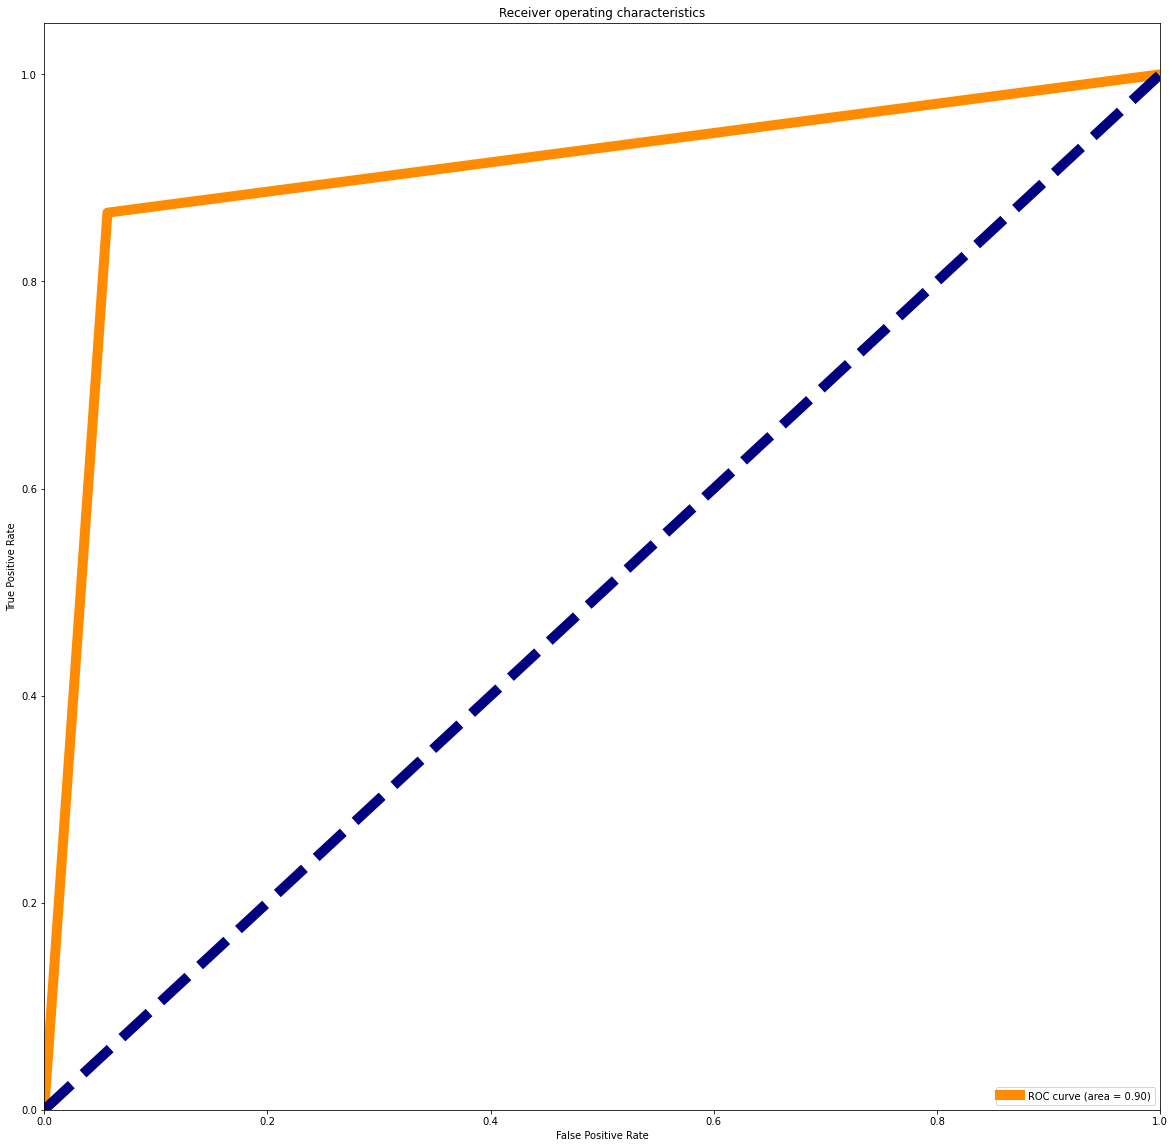

In [126]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

**WE CAN SEE THAT THE AREA UNDER ROC CURVE IS 90% ..THE MORE THE AREA UNDER CURVE THE MORE THE ACCURACY IS.**

In [131]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,sv.predict(x_test))


In [132]:
print(auc_score)

0.9056558493837865


# SAvE FiLe

In [134]:
import pickle
filename='winerep.pkl'
pickle.dump(sv,open(filename,'wb'))

In [135]:
loaded_model=pickle.load(open('winerep.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

90.37328094302553


# ------------------------------------------------------------------------------------------------------

# -------------------------------------------END----------------------------------------------------

# ----------------------------------------------------------------------------------------------------